In [447]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.rcParams['animation.embed_limit'] = 2**128

Populating the interactive namespace from numpy and matplotlib


# 1a) Plotting the Environment

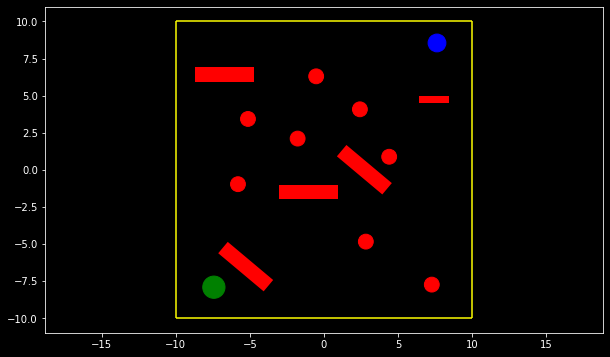

In [448]:
# Initial location of the robot
circ_start = plt.Circle((7.6250, 8.5500), 0.6, color='b')
circ_goal = plt.Circle((-7.4250, -7.9250), 0.75, color='g')

cub1 = plt.Rectangle((6.4250, 4.4750), 2, .5, fc='r')
cub2 = plt.Rectangle((-3.0250, -2.000), 4, 1, fc='r')
cub3 = plt.Rectangle((-8.7000, 5.9000), 4, 1, fc='r')
cub4 = plt.Rectangle((0.8720, 0.9030), 4, 1, angle=-40.0, fc='r')
cub5 = plt.Rectangle((-7.1320, -5.6330), 4, 1, angle=-40.0, fc='r')

cyl1 = plt.Circle((-0.5250, 6.3000), .5, color='r')
cyl2 = plt.Circle((2.4250, 4.0750), .5, color='r')
cyl3 = plt.Circle((4.4000, 0.8750), .5, color='r')
cyl4 = plt.Circle((-1.7750, 2.1000), .5, color='r')
cyl5 = plt.Circle((-5.1250, 3.4250), .5, color='r')
cyl6 = plt.Circle((-5.8000, -0.9750), .5, color='r')
cyl7 = plt.Circle((2.8250, -4.8500), .5, color='r')
cyl8 = plt.Circle((7.2750, -7.7500), .5, color='r')

plt.gca().add_patch(circ_start)
plt.gca().add_patch(circ_goal)
plt.gca().add_patch(cub1)
plt.gca().add_patch(cub2)
plt.gca().add_patch(cub3)
plt.gca().add_patch(cub4)
plt.gca().add_patch(cub5)
plt.gca().add_patch(cyl1)
plt.gca().add_patch(cyl2)
plt.gca().add_patch(cyl3)
plt.gca().add_patch(cyl4)
plt.gca().add_patch(cyl5)
plt.gca().add_patch(cyl6)
plt.gca().add_patch(cyl7)
plt.gca().add_patch(cyl8)

#Adjust axes so shapes are scaled properly
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.axis("equal")

#Add boundaries to show where actual space is
plt.vlines([-10,10],-10,10,colors='yellow')
plt.hlines([-10,10],-10,10,colors='yellow')
show()

# 1b) Potential functions

In [449]:
# Potential functions
def force_goal(x, y, goal):
    goal_x, goal_y, k_goal = goal
    Fx_goal, Fy_goal = k_goal * (goal_x - x), k_goal *(goal_y - y)
    return Fx_goal, Fy_goal

def force_obstacle(x, y, obstacle):
    (obs_x, obs_y, k_obs) = obstacle
    dist_x, dist_y = x - obs_x, y - obs_y
    dist_obs = np.hypot(dist_x, dist_y)
    Fx_obs = (dist_x / dist_obs) * k_obs / dist_obs ** 3
    Fy_obs = (dist_y / dist_obs) * k_obs / dist_obs ** 3

    return Fx_obs, Fy_obs 

def total_force(x, y, goal, obstacles):
    Fx, Fy = force_goal(x, y, goal)

    for obs in obstacles:
        Fo_x, Fo_y = force_obstacle(x, y, obs)
        Fx += Fo_x
        Fy += Fo_y
    return Fx, Fy

In [450]:
 def plot_vector_field(ax=plt, fmax = .5):
    X, Y = np.meshgrid(np.arange(-10, 10, .35), np.arange(-10, 10, .35))

    # Vector field of the forces
    Fx, Fy = total_force(X, Y, goal, obstacles)

    # For visualization
    F_m = np.hypot(Fx, Fy)
    Fx[F_m > fmax], Fy[F_m > fmax] = None, None
    # Plot
    # quiver(X, Y, Fx, Fy,  F_m, color='0.4', scale=None)
    ax.quiver(X, Y, Fx, Fy, color='0.4')
    

    

def simulate(q, goal, obstacles, num_steps=200, delta_time=1.9):
    trajectory = []
    trajectory.append(np.copy(q))
    for i in range(num_steps):
        force = total_force(q[0], q[1], goal, obstacles)
        # Robot velocity follows the force vector
        vel = np.array(force)
        # Integrate
        q += vel * delta_time
        trajectory.append(np.copy(q))

    
    return np.array(trajectory)

# Applying Potential Functions to Environment

In [451]:
# Goal
goal = [-7.4250, -7.9250, 0.02]

# Obstacles (x, y, k), where k is the rejection multiplier
obstacles = [[7.4250, 4.7250, 1.25], # Cuboid closest to start
             [2.4250, 4.0750, .35], # Cylinder closest to start
             [-0.5250, 6.3000, .05], # Cylinder slightly left and up of previous
             [4.4000, 0.8750, .05], # Cylinder right above below cuboid
             [2.7250, -0.00000027, 2.10], # Tilted cuboid toward center
             [1.4250, 0.9000, .50], #Tilted cuboid toward center - little helper bubble for the tilted portion near the path of the robot
             [-1.7750, 2.1000, .175], # Cylinder closest to center
             [-1.0250, -1.5000, 2], # Other cuboid at center
             [-5.8000, -0.9750, .05], # Cylinder left of previous cuboid
             [-6.7000, 6.4000, 1], # Cuboid far top left
             [-5.1250, 3.4250, .05], # Cylinder right under previous cuboid
             [2.8250, -4.8500, .05], # Low right cylinder toward center 
             [7.2750, -7.7500, .05], #Cylinder far right down
             [-5.1500, -6.2000, .05], # Tilted closest to goal
             [-6.6500, -5.4250, .15] # Tilted closest to goal - little helper bubble for the tilted portion near the path of the robot
              ]

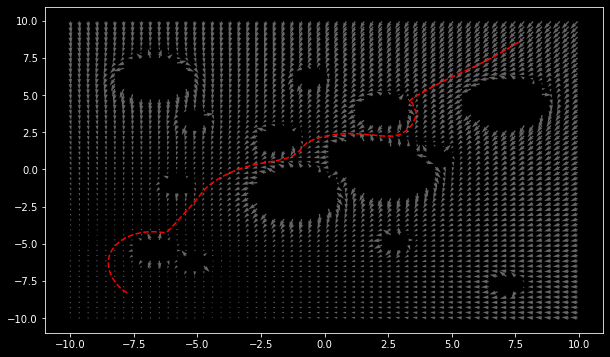

In [452]:
# Initial location of the robot
q = np.array((7.6250, 8.5500))

trajectory = simulate(q, goal, obstacles)
plot(trajectory[:,0], trajectory[:,1], 'r--')
plot_vector_field()

# 4a and 4b) Testing with a New Starting Point

# NOTE: All communications with the robot for question 1 is done further below

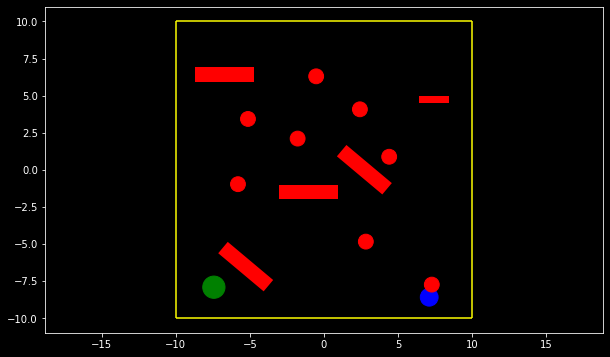

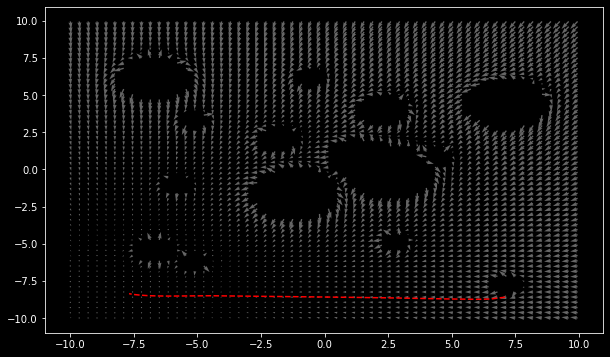

In [289]:
# Make new plots and run potential function simulation with new start position

# Initial location of the robot
circ_start = plt.Circle((7.1000, -8.6000), 0.6, color='b')
circ_goal = plt.Circle((-7.4250, -7.9250), 0.75, color='g')

cub1 = plt.Rectangle((6.4250, 4.4750), 2, .5, fc='r')
cub2 = plt.Rectangle((-3.0250, -2.000), 4, 1, fc='r')
cub3 = plt.Rectangle((-8.7000, 5.9000), 4, 1, fc='r')
cub4 = plt.Rectangle((0.8720, 0.9030), 4, 1, angle=-40.0, fc='r')
cub5 = plt.Rectangle((-7.1320, -5.6330), 4, 1, angle=-40.0, fc='r')

cyl1 = plt.Circle((-0.5250, 6.3000), .5, color='r')
cyl2 = plt.Circle((2.4250, 4.0750), .5, color='r')
cyl3 = plt.Circle((4.4000, 0.8750), .5, color='r')
cyl4 = plt.Circle((-1.7750, 2.1000), .5, color='r')
cyl5 = plt.Circle((-5.1250, 3.4250), .5, color='r')
cyl6 = plt.Circle((-5.8000, -0.9750), .5, color='r')
cyl7 = plt.Circle((2.8250, -4.8500), .5, color='r')
cyl8 = plt.Circle((7.2750, -7.7500), .5, color='r')

plt.gca().add_patch(circ_start)
plt.gca().add_patch(circ_goal)
plt.gca().add_patch(cub1)
plt.gca().add_patch(cub2)
plt.gca().add_patch(cub3)
plt.gca().add_patch(cub4)
plt.gca().add_patch(cub5)
plt.gca().add_patch(cyl1)
plt.gca().add_patch(cyl2)
plt.gca().add_patch(cyl3)
plt.gca().add_patch(cyl4)
plt.gca().add_patch(cyl5)
plt.gca().add_patch(cyl6)
plt.gca().add_patch(cyl7)
plt.gca().add_patch(cyl8)

#Adjust axes so shapes are scaled properly
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.axis("equal")

#Add boundaries to show where actual space is
plt.vlines([-10,10],-10,10,colors='yellow')
plt.hlines([-10,10],-10,10,colors='yellow')
show()

# Initial location of the robot
q_new = np.array((7.1000, -8.6000))

new_trajectory = simulate(q_new, goal, obstacles)
plot(new_trajectory[:,0], new_trajectory[:,1], 'r--')
plot_vector_field()

# 1c) Convert Potential Field Path to Trajectory and Send to Robot

## Deriving Coefficients for Motion Equation for each point along the path

In [453]:
# Global scope arrays to which we append tuples from trajectory calculations
a0_pairs = []
a1_pairs = []
a2_pairs = []
a3_pairs = []

In [454]:
def point_to_point_traj(x1, x2, v1, v2, delta_t, is_x, idx):
    t = np.linspace(0, delta_t, 100)  
    a0 = x1
    a1 = v1
    a2 = (3*x2 - 3*x1 - 2*v1*delta_t - v2 * delta_t) / (delta_t**2)
    a3 = (2*x1 + (v1 + v2) * delta_t  - 2 * x2) / (delta_t**3)

    polynomial = a0 + a1 * t + a2 * t**2 + a3 * t**3
    derivative = a1 + 2*a2 * t + 3 * a3 * t**2
    print('a0: (%.4f) '%(a0))
    print('a1: (%.4f) '%(a1))
    print('a2: (%.4f) '%(a2))
    print('a3: (%.4f) '%(a3))
    if(is_x):
        a0_pairs.append([a0,0])
        a1_pairs.append([a1,0])
        a2_pairs.append([a2,0])
        a3_pairs.append([a3,0])
    else:
        a0_pairs[-1][1] = a0
        a1_pairs[-1][1] = a1
        a2_pairs[-1][1] = a2
        a3_pairs[-1][1] = a3
    
    return polynomial, derivative


def piecewise2D (X,Y, Vx, Vy, T):
    theta_x, theta_y, dx, dy = [], [], [], []
        
    count = 1
    for i in range(len(P)-1):
        print(count)
        print('x')
        theta_xi, dxi = point_to_point_traj(X[i], X[i+1], Vx[i], Vx[i+1], T[i+1] - T[i], True, i)
        print('y')
        theta_yi, dyi = point_to_point_traj(Y[i], Y[i+1], Vy[i], Vy[i+1], T[i+1] - T[i], False, i)
        print('=================')
        
        theta_x += theta_xi.tolist()
        theta_y += theta_yi.tolist()
        dx += dxi.tolist()
        dy += dyi.tolist()
        count = count+1
        plot(theta_xi, theta_yi)
    return theta_x, theta_y, dx, dy

1
x
a0: (7.6250) 
a1: (0.0000) 
a2: (-0.4224) 
a3: (0.1408) 
y
a0: (8.5500) 
a1: (0.0000) 
a2: (-0.4323) 
a3: (0.1441) 
2
x
a0: (7.0617) 
a1: (0.0000) 
a2: (-0.4124) 
a3: (0.1375) 
y
a0: (7.9737) 
a1: (0.0000) 
a2: (-0.3951) 
a3: (0.1317) 
3
x
a0: (6.5119) 
a1: (0.0000) 
a2: (-0.4131) 
a3: (0.1377) 
y
a0: (7.4468) 
a1: (0.0000) 
a2: (-0.3571) 
a3: (0.1190) 
4
x
a0: (5.9611) 
a1: (0.0000) 
a2: (-0.4214) 
a3: (0.1405) 
y
a0: (6.9706) 
a1: (0.0000) 
a2: (-0.3342) 
a3: (0.1114) 
5
x
a0: (5.3992) 
a1: (0.0000) 
a2: (-0.4178) 
a3: (0.1393) 
y
a0: (6.5251) 
a1: (0.0000) 
a2: (-0.3344) 
a3: (0.1115) 
6
x
a0: (4.8421) 
a1: (0.0000) 
a2: (-0.3915) 
a3: (0.1305) 
y
a0: (6.0793) 
a1: (0.0000) 
a2: (-0.3390) 
a3: (0.1130) 
7
x
a0: (4.3201) 
a1: (0.0000) 
a2: (-0.3480) 
a3: (0.1160) 
y
a0: (5.6273) 
a1: (0.0000) 
a2: (-0.3278) 
a3: (0.1093) 
8
x
a0: (3.8562) 
a1: (0.0000) 
a2: (-0.2806) 
a3: (0.0935) 
y
a0: (5.1902) 
a1: (0.0000) 
a2: (-0.2876) 
a3: (0.0959) 
9
x
a0: (3.4821) 
a1: (0.0000) 
a2: (-0.

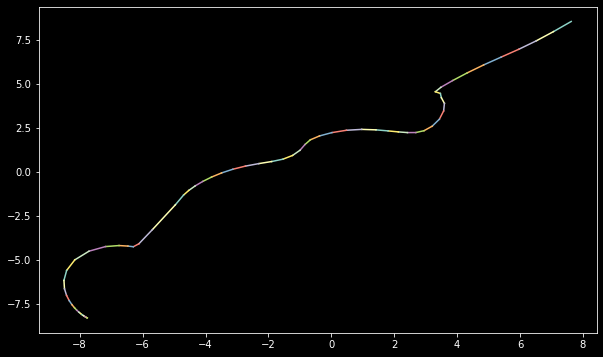

In [455]:
##### Requirements for the trajectory

# P is the trajectory, which has 201 entries b/c num_steps=200, plus one to account for initial position
# But we can/should trim P because after the ~40th entry, many of the points are so close together it slows us down.
P_temp = []
for i in range(len(trajectory)-1):
    # Add coords as normal for first 40 coordinate pairs
    # After that, only add every 6th coordinate pair to P
    # Note that we want to keep our final position correct, so we don't remove that if it so happens that the last index
    # is in the set to be removed.
    if(i <= 40):
        P_temp.append([trajectory[i][0], trajectory[i][1]])
    else:
        if(i % 6 == 0):
            P_temp.append([trajectory[i][0], trajectory[i][1]])

P = np.array(P_temp)

vel = []
# Starting velocity must be 0
vel.append(np.array([0,0]))
# Velocities - let's make it constant
for i in range(len(P)-2):
    vel.append(np.array([0,0])) #[-.25,-.1]

# Ending velocity must be 0
vel.append(np.array([0,0]))

times = []
tot = 0
# Time - equal increments
for i in P:
    times.append(tot)
    tot=tot+2

# Grouping for V and T
V = np.array(vel)
T = times

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]

# Piecewise function for spline
theta_x, theta_y, dx, dy = piecewise2D(X,Y, Vx, Vy, T)

## Connect to CoppeliaSim

In [456]:
import sim
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Robot Class

In [457]:
class robot():
    
    def __init__(self, frame_name, motor_names=[], client_id=0):  
        # If there is an existing connection
        if client_id:
                self.client_id = client_id
        else:
            self.client_id = self.open_connection()
            
        self.motors = self._get_handlers(motor_names) 
        
        # Robot frame
        self.frame =  self._get_handler(frame_name)
            
        
    def open_connection(self):
        sim.simxFinish(-1)  # just in case, close all opened connections
        self.client_id = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim 
        
        if clientID != -1:
            print('Robot connected')
        else:
            print('Connection failed')
        return clientID
        
    def close_connection(self):    
        sim.simxGetPingTime(self.client_id)  # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive.
        sim.simxFinish(self.client_id)  # Now close the connection to CoppeliaSim:
        print('Connection closed')
    
    def isConnected(self):
        c,result = sim.simxGetPingTime(self.client_id)
        # Return true if the robot is connected
        return result > 0         
        
    def _get_handler(self, name):
        err_code, handler = sim.simxGetObjectHandle(self.client_id, name, sim.simx_opmode_blocking)
        return handler
    
    def _get_handlers(self, names):
        handlers = []
        for name in names:
            handler = self._get_handler(name)
            handlers.append(handler)
        
        return handlers

    def send_motor_velocities(self, vels):
        for motor, vel in zip(self.motors, vels):
            err_code = sim.simxSetJointTargetVelocity(self.client_id, 
                                                      motor, vel, sim.simx_opmode_streaming)      
            
    def set_position(self, position, relative_object=-1):
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)        
        sim.simxSetObjectPosition(clientID, self.frame, relative_object, position, sim.simx_opmode_oneshot)
        
    def simtime(self):
        return sim.simxGetLastCmdTime(self.client_id)
    
    def get_position(self, relative_object=-1):
        # Get position relative to an object, -1 for global frame
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)
        res, position = sim.simxGetObjectPosition(self.client_id, self.frame, relative_object, sim.simx_opmode_blocking)        
        return array(position)
    
    def get_object_position(self, object_name):
        # Get Object position in the world frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, -1, sim.simx_opmode_blocking)
        return array(position)
    
    def get_object_relative_position(self, object_name):        
        # Get Object position in the robot frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, self.frame, sim.simx_opmode_blocking)
        return array(position)

### Check if Python is connecting

In [458]:
sim.simxFinish(-1)  # Close opened connections
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim

if clientID != -1:
    print('Connected')

    # Now try to retrieve data in a blocking fashion (i.e. a service call):
    res, objs = sim.simxGetObjects(clientID, sim.sim_handle_all, sim.simx_opmode_blocking)

    print('Simulation time in milliseconds: ', sim.simxGetLastCmdTime(clientID))
    
    # Get Object position
    name = 'Omnirob'
    err_code, cuboid = sim.simxGetObjectHandle(clientID, name, sim.simx_opmode_blocking)
    res, position = sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)        
    print('Omnirob is at [x,y,z]=', position)
    
    # Now close the connection to CoppeliaSim:
    sim.simxGetPingTime(clientID)
    sim.simxFinish(clientID)
    print('Disconnected')
else:
    print('Failed connecting to remote API server')

Connected
Simulation time in milliseconds:  14200
Omnirob is at [x,y,z]= [7.624996185302734, 8.548818588256836, 0.3544993996620178]
Disconnected


## Sending Commands to Motors Based on Coefficients

In [460]:
# Joint name in coppelia
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot('Omnirob', motor_names)  # Create an instance of our robot

# Initial locations
robot_position = r.get_position()
print('Robot position: (%.2f, %.2f) '%(robot_position[0], robot_position[1]))

# Virtual disk
disk = robot('Disc', client_id=r.client_id)

# Time duration
tf = 2
# Time interval
time_steps = linspace(0, tf, 200)

count = 0
for wp in range(len(P) - 1):  
    print("Count: ",count)
    a0 = a0_pairs[count]
    a1 = a1_pairs[count]
    a2 = a2_pairs[count]
    a3 = a3_pairs[count]
    print('a0: %s'%(a0))
    print('a1: %s'%(a1))
    print('a2: %s'%(a2))
    print('a3: %s'%(a3))

    for t in time_steps:
        # Compute trajectory
        x_point_traj = a0[0] + a1[0]*t + a2[0]*(t**2) + a3[0]*(t**3) #Gamma_x
        x_vel_traj = a1[0] + 2*a2[0]*t + 3*a3[0]*(t**2) #Derivative of Gamma_x
        y_point_traj = a0[1] + a1[1]*t + a2[1]*(t**2) + a3[1]*(t**3) #Gamma_y
        y_vel_traj = a1[1] + 2*a2[1]*t + 3*a3[1]*(t**2) #Derivative of Gamma_y
        print('(%.4f,%.4f)' %(x_point_traj, y_point_traj))

        disk.set_position([x_point_traj, y_point_traj])

        # Sensing
        robot_position = r.get_position()

        # Trajectory tracker
        u = 10 * (np.array([x_point_traj, y_point_traj, 0]) - robot_position) + np.array([x_vel_traj, y_vel_traj, 0])

        vx, vy, vz = u
        r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])

        time.sleep(tf/500)
    
    count+=1

    r.send_motor_velocities([0,0,0,0])
r.close_connection()

Robot connected
Robot position: (7.62, 8.55) 
Robot connected
Count:  0
a0: [7.625, 8.55]
a1: [0, 0]
a2: [-0.42244033263021663, -0.43225924444717023]
a3: [0.14081344421007214, 0.14408641481572348]
(7.6250,8.5500)
(7.6250,8.5500)
(7.6248,8.5498)
(7.6246,8.5496)
(7.6243,8.5493)
(7.6240,8.5489)
(7.6235,8.5485)
(7.6230,8.5479)
(7.6223,8.5473)
(7.6216,8.5466)
(7.6209,8.5458)
(7.6200,8.5449)
(7.6191,8.5440)
(7.6181,8.5429)
(7.6170,8.5418)
(7.6159,8.5407)
(7.6147,8.5394)
(7.6134,8.5381)
(7.6120,8.5367)
(7.6106,8.5352)
(7.6091,8.5337)
(7.6075,8.5321)
(7.6059,8.5304)
(7.6042,8.5287)
(7.6024,8.5269)
(7.6006,8.5250)
(7.5987,8.5231)
(7.5967,8.5210)
(7.5947,8.5190)
(7.5926,8.5168)
(7.5905,8.5147)
(7.5883,8.5124)
(7.5860,8.5101)
(7.5837,8.5077)
(7.5813,8.5053)
(7.5789,8.5028)
(7.5764,8.5002)
(7.5738,8.4976)
(7.5712,8.4950)
(7.5686,8.4923)
(7.5659,8.4895)
(7.5631,8.4867)
(7.5603,8.4838)
(7.5575,8.4809)
(7.5546,8.4779)
(7.5516,8.4749)
(7.5486,8.4718)
(7.5456,8.4687)
(7.5425,8.4656)
(7.5394,8.4624)
(7.

(6.3124,7.2744)
(6.3084,7.2709)
(6.3044,7.2674)
(6.3004,7.2639)
(6.2963,7.2604)
(6.2922,7.2569)
(6.2881,7.2533)
(6.2841,7.2498)
(6.2799,7.2463)
(6.2758,7.2427)
(6.2717,7.2391)
(6.2676,7.2356)
(6.2635,7.2320)
(6.2593,7.2284)
(6.2552,7.2249)
(6.2510,7.2213)
(6.2469,7.2177)
(6.2427,7.2141)
(6.2386,7.2105)
(6.2344,7.2069)
(6.2303,7.2033)
(6.2261,7.1997)
(6.2220,7.1962)
(6.2178,7.1926)
(6.2137,7.1890)
(6.2096,7.1854)
(6.2054,7.1818)
(6.2013,7.1783)
(6.1972,7.1747)
(6.1931,7.1712)
(6.1890,7.1676)
(6.1849,7.1641)
(6.1808,7.1606)
(6.1767,7.1570)
(6.1727,7.1535)
(6.1686,7.1500)
(6.1646,7.1466)
(6.1606,7.1431)
(6.1566,7.1396)
(6.1526,7.1362)
(6.1486,7.1327)
(6.1447,7.1293)
(6.1408,7.1259)
(6.1368,7.1226)
(6.1330,7.1192)
(6.1291,7.1158)
(6.1252,7.1125)
(6.1214,7.1092)
(6.1176,7.1059)
(6.1138,7.1027)
(6.1101,7.0994)
(6.1064,7.0962)
(6.1027,7.0930)
(6.0990,7.0898)
(6.0954,7.0867)
(6.0918,7.0836)
(6.0882,7.0805)
(6.0846,7.0774)
(6.0811,7.0744)
(6.0776,7.0714)
(6.0742,7.0684)
(6.0708,7.0654)
(6.0674,

(4.8662,6.0986)
(4.8644,6.0972)
(4.8627,6.0958)
(4.8610,6.0944)
(4.8594,6.0931)
(4.8578,6.0919)
(4.8563,6.0907)
(4.8549,6.0895)
(4.8536,6.0885)
(4.8523,6.0874)
(4.8511,6.0865)
(4.8500,6.0856)
(4.8489,6.0847)
(4.8479,6.0839)
(4.8470,6.0832)
(4.8462,6.0825)
(4.8454,6.0819)
(4.8447,6.0814)
(4.8441,6.0809)
(4.8436,6.0805)
(4.8431,6.0801)
(4.8427,6.0798)
(4.8424,6.0796)
(4.8422,6.0794)
(4.8421,6.0793)
(4.8421,6.0793)
Count:  5
a0: [4.842073518027926, 6.079263459570869]
a1: [0, 0]
a2: [-0.39145958648379153, -0.3389566410882576]
a3: [0.13048652882793066, 0.11298554702941899]
(4.8421,6.0793)
(4.8420,6.0792)
(4.8419,6.0791)
(4.8417,6.0790)
(4.8414,6.0787)
(4.8411,6.0784)
(4.8407,6.0781)
(4.8402,6.0776)
(4.8396,6.0771)
(4.8390,6.0766)
(4.8383,6.0760)
(4.8375,6.0753)
(4.8366,6.0745)
(4.8357,6.0737)
(4.8347,6.0729)
(4.8336,6.0719)
(4.8325,6.0710)
(4.8313,6.0699)
(4.8300,6.0688)
(4.8287,6.0677)
(4.8273,6.0665)
(4.8259,6.0652)
(4.8243,6.0639)
(4.8228,6.0625)
(4.8211,6.0611)
(4.8194,6.0597)
(4.8177,6

(3.7770,5.1091)
(3.7746,5.1067)
(3.7723,5.1042)
(3.7698,5.1018)
(3.7674,5.0993)
(3.7650,5.0968)
(3.7625,5.0942)
(3.7600,5.0917)
(3.7575,5.0891)
(3.7550,5.0865)
(3.7524,5.0839)
(3.7499,5.0813)
(3.7473,5.0786)
(3.7447,5.0760)
(3.7421,5.0733)
(3.7394,5.0706)
(3.7368,5.0679)
(3.7341,5.0652)
(3.7315,5.0624)
(3.7288,5.0597)
(3.7261,5.0569)
(3.7234,5.0541)
(3.7207,5.0514)
(3.7179,5.0486)
(3.7152,5.0458)
(3.7125,5.0429)
(3.7097,5.0401)
(3.7069,5.0373)
(3.7042,5.0344)
(3.7014,5.0316)
(3.6986,5.0287)
(3.6958,5.0259)
(3.6930,5.0230)
(3.6902,5.0201)
(3.6874,5.0173)
(3.6846,5.0144)
(3.6818,5.0115)
(3.6790,5.0086)
(3.6762,5.0057)
(3.6733,5.0028)
(3.6705,5.0000)
(3.6677,4.9971)
(3.6649,4.9942)
(3.6621,4.9913)
(3.6592,4.9884)
(3.6564,4.9855)
(3.6536,4.9826)
(3.6508,4.9797)
(3.6480,4.9769)
(3.6452,4.9740)
(3.6424,4.9711)
(3.6396,4.9683)
(3.6368,4.9654)
(3.6340,4.9626)
(3.6313,4.9597)
(3.6285,4.9569)
(3.6258,4.9541)
(3.6230,4.9513)
(3.6203,4.9484)
(3.6175,4.9456)
(3.6148,4.9429)
(3.6121,4.9401)
(3.6094,

(3.4449,4.4686)
(3.4457,4.4681)
(3.4466,4.4676)
(3.4473,4.4672)
(3.4481,4.4667)
(3.4489,4.4662)
(3.4496,4.4658)
(3.4504,4.4653)
(3.4511,4.4649)
(3.4518,4.4644)
(3.4525,4.4640)
(3.4531,4.4636)
(3.4538,4.4632)
(3.4544,4.4628)
(3.4551,4.4624)
(3.4557,4.4620)
(3.4563,4.4617)
(3.4568,4.4613)
(3.4574,4.4610)
(3.4579,4.4607)
(3.4584,4.4603)
(3.4589,4.4600)
(3.4594,4.4597)
(3.4599,4.4595)
(3.4603,4.4592)
(3.4608,4.4589)
(3.4612,4.4587)
(3.4615,4.4584)
(3.4619,4.4582)
(3.4622,4.4580)
(3.4626,4.4578)
(3.4629,4.4576)
(3.4632,4.4574)
(3.4634,4.4573)
(3.4637,4.4571)
(3.4639,4.4570)
(3.4641,4.4569)
(3.4642,4.4568)
(3.4644,4.4567)
(3.4645,4.4566)
(3.4646,4.4565)
(3.4647,4.4565)
(3.4648,4.4564)
(3.4648,4.4564)
(3.4648,4.4564)
Count:  10
a0: [3.464825387123886, 4.456414415376215]
a1: [0, 0]
a2: [0.023543830822666312, -0.1803668488757535]
a3: [-0.007847943607555363, 0.06012228295858457]
(3.4648,4.4564)
(3.4648,4.4564)
(3.4648,4.4563)
(3.4648,4.4563)
(3.4649,4.4561)
(3.4649,4.4560)
(3.4649,4.4558)
(3.464

(3.5910,3.8465)
(3.5909,3.8444)
(3.5908,3.8423)
(3.5906,3.8401)
(3.5905,3.8379)
(3.5904,3.8356)
(3.5902,3.8333)
(3.5901,3.8310)
(3.5900,3.8286)
(3.5898,3.8262)
(3.5897,3.8238)
(3.5895,3.8213)
(3.5894,3.8188)
(3.5893,3.8163)
(3.5891,3.8137)
(3.5890,3.8111)
(3.5888,3.8085)
(3.5887,3.8059)
(3.5885,3.8032)
(3.5883,3.8005)
(3.5882,3.7978)
(3.5880,3.7950)
(3.5879,3.7922)
(3.5877,3.7894)
(3.5875,3.7866)
(3.5874,3.7838)
(3.5872,3.7809)
(3.5870,3.7780)
(3.5869,3.7751)
(3.5867,3.7721)
(3.5865,3.7692)
(3.5863,3.7662)
(3.5862,3.7632)
(3.5860,3.7602)
(3.5858,3.7571)
(3.5856,3.7541)
(3.5855,3.7510)
(3.5853,3.7480)
(3.5851,3.7449)
(3.5849,3.7417)
(3.5847,3.7386)
(3.5846,3.7355)
(3.5844,3.7323)
(3.5842,3.7292)
(3.5840,3.7260)
(3.5838,3.7228)
(3.5836,3.7196)
(3.5835,3.7164)
(3.5833,3.7132)
(3.5831,3.7100)
(3.5829,3.7068)
(3.5827,3.7036)
(3.5825,3.7003)
(3.5823,3.6971)
(3.5821,3.6939)
(3.5820,3.6906)
(3.5818,3.6874)
(3.5816,3.6841)
(3.5814,3.6809)
(3.5812,3.6776)
(3.5810,3.6743)
(3.5808,3.6711)
(3.5806,

(3.2618,2.6935)
(3.2603,2.6909)
(3.2588,2.6883)
(3.2573,2.6857)
(3.2558,2.6832)
(3.2544,2.6806)
(3.2529,2.6781)
(3.2515,2.6756)
(3.2501,2.6732)
(3.2487,2.6707)
(3.2473,2.6683)
(3.2459,2.6660)
(3.2446,2.6636)
(3.2432,2.6613)
(3.2419,2.6590)
(3.2406,2.6567)
(3.2393,2.6545)
(3.2380,2.6523)
(3.2368,2.6501)
(3.2355,2.6479)
(3.2343,2.6458)
(3.2331,2.6437)
(3.2320,2.6417)
(3.2308,2.6397)
(3.2297,2.6377)
(3.2285,2.6358)
(3.2274,2.6339)
(3.2264,2.6320)
(3.2253,2.6302)
(3.2243,2.6284)
(3.2233,2.6266)
(3.2223,2.6249)
(3.2213,2.6232)
(3.2204,2.6216)
(3.2195,2.6200)
(3.2186,2.6184)
(3.2177,2.6169)
(3.2168,2.6154)
(3.2160,2.6140)
(3.2152,2.6126)
(3.2145,2.6113)
(3.2137,2.6100)
(3.2130,2.6088)
(3.2123,2.6076)
(3.2116,2.6064)
(3.2110,2.6053)
(3.2104,2.6042)
(3.2098,2.6032)
(3.2093,2.6023)
(3.2087,2.6014)
(3.2082,2.6005)
(3.2078,2.5997)
(3.2073,2.5989)
(3.2069,2.5982)
(3.2066,2.5976)
(3.2062,2.5970)
(3.2059,2.5964)
(3.2056,2.5959)
(3.2054,2.5955)
(3.2051,2.5951)
(3.2050,2.5948)
(3.2048,2.5945)
(3.2047,

(2.6809,2.2333)
(2.6803,2.2333)
(2.6797,2.2333)
(2.6791,2.2333)
(2.6784,2.2333)
(2.6777,2.2333)
(2.6770,2.2333)
(2.6762,2.2333)
(2.6754,2.2333)
(2.6745,2.2333)
(2.6737,2.2333)
(2.6728,2.2332)
(2.6718,2.2332)
(2.6709,2.2332)
(2.6699,2.2332)
(2.6689,2.2332)
(2.6678,2.2332)
(2.6668,2.2332)
(2.6657,2.2332)
(2.6646,2.2332)
(2.6634,2.2332)
(2.6622,2.2332)
(2.6610,2.2331)
(2.6598,2.2331)
(2.6585,2.2331)
(2.6573,2.2331)
(2.6559,2.2331)
(2.6546,2.2331)
(2.6533,2.2331)
(2.6519,2.2331)
(2.6505,2.2331)
(2.6491,2.2330)
(2.6476,2.2330)
(2.6462,2.2330)
(2.6447,2.2330)
(2.6432,2.2330)
(2.6417,2.2330)
(2.6401,2.2330)
(2.6386,2.2329)
(2.6370,2.2329)
(2.6354,2.2329)
(2.6338,2.2329)
(2.6321,2.2329)
(2.6305,2.2329)
(2.6288,2.2329)
(2.6271,2.2328)
(2.6254,2.2328)
(2.6237,2.2328)
(2.6220,2.2328)
(2.6202,2.2328)
(2.6185,2.2328)
(2.6167,2.2328)
(2.6149,2.2327)
(2.6131,2.2327)
(2.6113,2.2327)
(2.6095,2.2327)
(2.6076,2.2327)
(2.6058,2.2327)
(2.6039,2.2326)
(2.6020,2.2326)
(2.6002,2.2326)
(2.5983,2.2326)
(2.5964,

(1.9481,2.3012)
(1.9457,2.3016)
(1.9432,2.3020)
(1.9408,2.3025)
(1.9384,2.3029)
(1.9359,2.3033)
(1.9335,2.3037)
(1.9311,2.3041)
(1.9287,2.3046)
(1.9263,2.3050)
(1.9239,2.3054)
(1.9215,2.3058)
(1.9192,2.3062)
(1.9168,2.3066)
(1.9145,2.3070)
(1.9121,2.3074)
(1.9098,2.3078)
(1.9075,2.3082)
(1.9052,2.3086)
(1.9029,2.3090)
(1.9006,2.3094)
(1.8983,2.3098)
(1.8961,2.3102)
(1.8939,2.3106)
(1.8916,2.3110)
(1.8894,2.3114)
(1.8872,2.3117)
(1.8851,2.3121)
(1.8829,2.3125)
(1.8808,2.3129)
(1.8787,2.3132)
(1.8766,2.3136)
(1.8745,2.3140)
(1.8724,2.3143)
(1.8704,2.3147)
(1.8684,2.3150)
(1.8664,2.3154)
(1.8644,2.3157)
(1.8624,2.3160)
(1.8605,2.3164)
(1.8586,2.3167)
(1.8567,2.3170)
(1.8548,2.3174)
(1.8530,2.3177)
(1.8512,2.3180)
(1.8494,2.3183)
(1.8476,2.3186)
(1.8459,2.3189)
(1.8442,2.3192)
(1.8425,2.3195)
(1.8408,2.3198)
(1.8392,2.3201)
(1.8376,2.3203)
(1.8361,2.3206)
(1.8345,2.3209)
(1.8330,2.3211)
(1.8316,2.3214)
(1.8301,2.3217)
(1.8287,2.3219)
(1.8273,2.3221)
(1.8260,2.3224)
(1.8247,2.3226)
(1.8234,

(0.9649,2.4129)
Count:  22
a0: [0.9649273136095007, 2.4128835714918435]
a1: [0, 0]
a2: [-0.3646191483538335, -0.03756581057724406]
a3: [0.1215397161179445, 0.012521936859081317]
(0.9649,2.4129)
(0.9649,2.4129)
(0.9648,2.4129)
(0.9646,2.4128)
(0.9643,2.4128)
(0.9640,2.4128)
(0.9636,2.4127)
(0.9632,2.4127)
(0.9626,2.4126)
(0.9620,2.4126)
(0.9614,2.4125)
(0.9606,2.4124)
(0.9598,2.4124)
(0.9590,2.4123)
(0.9580,2.4122)
(0.9571,2.4121)
(0.9560,2.4120)
(0.9549,2.4118)
(0.9537,2.4117)
(0.9525,2.4116)
(0.9512,2.4115)
(0.9498,2.4113)
(0.9484,2.4112)
(0.9469,2.4110)
(0.9454,2.4109)
(0.9438,2.4107)
(0.9422,2.4105)
(0.9405,2.4104)
(0.9388,2.4102)
(0.9370,2.4100)
(0.9351,2.4098)
(0.9332,2.4096)
(0.9313,2.4094)
(0.9293,2.4092)
(0.9272,2.4090)
(0.9251,2.4088)
(0.9230,2.4086)
(0.9208,2.4083)
(0.9185,2.4081)
(0.9162,2.4079)
(0.9139,2.4076)
(0.9115,2.4074)
(0.9091,2.4071)
(0.9066,2.4069)
(0.9041,2.4066)
(0.9016,2.4064)
(0.8990,2.4061)
(0.8964,2.4058)
(0.8937,2.4055)
(0.8910,2.4053)
(0.8883,2.4050)
(0.885

(-0.1195,2.1644)
(-0.1223,2.1630)
(-0.1252,2.1616)
(-0.1281,2.1603)
(-0.1310,2.1589)
(-0.1339,2.1575)
(-0.1368,2.1561)
(-0.1397,2.1547)
(-0.1426,2.1533)
(-0.1455,2.1519)
(-0.1485,2.1505)
(-0.1514,2.1491)
(-0.1544,2.1477)
(-0.1573,2.1463)
(-0.1603,2.1449)
(-0.1633,2.1434)
(-0.1662,2.1420)
(-0.1692,2.1406)
(-0.1722,2.1392)
(-0.1751,2.1378)
(-0.1781,2.1363)
(-0.1811,2.1349)
(-0.1841,2.1335)
(-0.1870,2.1321)
(-0.1900,2.1306)
(-0.1930,2.1292)
(-0.1960,2.1278)
(-0.1989,2.1264)
(-0.2019,2.1250)
(-0.2048,2.1236)
(-0.2078,2.1221)
(-0.2107,2.1207)
(-0.2137,2.1193)
(-0.2166,2.1179)
(-0.2195,2.1165)
(-0.2224,2.1151)
(-0.2253,2.1137)
(-0.2282,2.1124)
(-0.2311,2.1110)
(-0.2340,2.1096)
(-0.2369,2.1082)
(-0.2397,2.1069)
(-0.2426,2.1055)
(-0.2454,2.1042)
(-0.2482,2.1028)
(-0.2510,2.1015)
(-0.2538,2.1001)
(-0.2566,2.0988)
(-0.2593,2.0975)
(-0.2621,2.0962)
(-0.2648,2.0949)
(-0.2675,2.0936)
(-0.2702,2.0923)
(-0.2729,2.0910)
(-0.2755,2.0898)
(-0.2781,2.0885)
(-0.2807,2.0873)
(-0.2833,2.0860)
(-0.2859,2.084

(-0.8113,1.5961)
(-0.8124,1.5945)
(-0.8133,1.5930)
(-0.8143,1.5914)
(-0.8153,1.5899)
(-0.8163,1.5884)
(-0.8172,1.5869)
(-0.8181,1.5855)
(-0.8190,1.5840)
(-0.8199,1.5826)
(-0.8208,1.5812)
(-0.8217,1.5799)
(-0.8225,1.5785)
(-0.8234,1.5772)
(-0.8242,1.5759)
(-0.8250,1.5746)
(-0.8258,1.5734)
(-0.8266,1.5721)
(-0.8273,1.5710)
(-0.8281,1.5698)
(-0.8288,1.5686)
(-0.8295,1.5675)
(-0.8302,1.5664)
(-0.8309,1.5654)
(-0.8315,1.5644)
(-0.8322,1.5634)
(-0.8328,1.5624)
(-0.8334,1.5614)
(-0.8340,1.5605)
(-0.8345,1.5597)
(-0.8351,1.5588)
(-0.8356,1.5580)
(-0.8361,1.5572)
(-0.8365,1.5565)
(-0.8370,1.5557)
(-0.8374,1.5550)
(-0.8379,1.5544)
(-0.8383,1.5538)
(-0.8386,1.5532)
(-0.8390,1.5526)
(-0.8393,1.5521)
(-0.8396,1.5516)
(-0.8399,1.5512)
(-0.8401,1.5508)
(-0.8404,1.5504)
(-0.8406,1.5501)
(-0.8408,1.5498)
(-0.8409,1.5495)
(-0.8411,1.5493)
(-0.8412,1.5491)
(-0.8413,1.5490)
(-0.8414,1.5489)
(-0.8414,1.5488)
(-0.8414,1.5488)
Count:  27
a0: [-0.8414044412706669, 1.5488119001788023]
a1: [0, 0]
a2: [-0.116984

(-1.2337,0.9313)
(-1.2338,0.9312)
(-1.2339,0.9311)
(-1.2341,0.9310)
(-1.2343,0.9309)
(-1.2345,0.9307)
(-1.2348,0.9305)
(-1.2351,0.9303)
(-1.2355,0.9300)
(-1.2359,0.9297)
(-1.2364,0.9294)
(-1.2369,0.9291)
(-1.2374,0.9287)
(-1.2380,0.9283)
(-1.2386,0.9279)
(-1.2393,0.9274)
(-1.2400,0.9269)
(-1.2407,0.9264)
(-1.2415,0.9259)
(-1.2423,0.9253)
(-1.2431,0.9247)
(-1.2440,0.9241)
(-1.2449,0.9235)
(-1.2459,0.9228)
(-1.2469,0.9221)
(-1.2479,0.9214)
(-1.2490,0.9207)
(-1.2500,0.9199)
(-1.2512,0.9191)
(-1.2523,0.9183)
(-1.2535,0.9175)
(-1.2547,0.9167)
(-1.2560,0.9158)
(-1.2573,0.9149)
(-1.2586,0.9140)
(-1.2599,0.9131)
(-1.2613,0.9121)
(-1.2627,0.9111)
(-1.2641,0.9101)
(-1.2656,0.9091)
(-1.2670,0.9081)
(-1.2686,0.9070)
(-1.2701,0.9060)
(-1.2717,0.9049)
(-1.2732,0.9038)
(-1.2749,0.9027)
(-1.2765,0.9015)
(-1.2782,0.9004)
(-1.2799,0.8992)
(-1.2816,0.8980)
(-1.2833,0.8968)
(-1.2851,0.8956)
(-1.2868,0.8944)
(-1.2886,0.8931)
(-1.2904,0.8918)
(-1.2923,0.8906)
(-1.2941,0.8893)
(-1.2960,0.8880)
(-1.2979,0.886

(-2.0019,0.5547)
(-2.0046,0.5539)
(-2.0073,0.5531)
(-2.0101,0.5523)
(-2.0129,0.5515)
(-2.0157,0.5507)
(-2.0185,0.5499)
(-2.0214,0.5490)
(-2.0242,0.5482)
(-2.0271,0.5474)
(-2.0300,0.5466)
(-2.0329,0.5457)
(-2.0358,0.5449)
(-2.0388,0.5440)
(-2.0417,0.5432)
(-2.0447,0.5423)
(-2.0477,0.5415)
(-2.0507,0.5406)
(-2.0537,0.5397)
(-2.0567,0.5389)
(-2.0597,0.5380)
(-2.0627,0.5371)
(-2.0658,0.5362)
(-2.0688,0.5354)
(-2.0718,0.5345)
(-2.0749,0.5336)
(-2.0780,0.5327)
(-2.0810,0.5318)
(-2.0841,0.5310)
(-2.0872,0.5301)
(-2.0903,0.5292)
(-2.0934,0.5283)
(-2.0964,0.5274)
(-2.0995,0.5265)
(-2.1026,0.5256)
(-2.1057,0.5247)
(-2.1088,0.5238)
(-2.1119,0.5229)
(-2.1150,0.5221)
(-2.1181,0.5212)
(-2.1211,0.5203)
(-2.1242,0.5194)
(-2.1273,0.5185)
(-2.1304,0.5176)
(-2.1334,0.5167)
(-2.1365,0.5159)
(-2.1395,0.5150)
(-2.1426,0.5141)
(-2.1456,0.5132)
(-2.1486,0.5124)
(-2.1517,0.5115)
(-2.1547,0.5106)
(-2.1577,0.5097)
(-2.1607,0.5089)
(-2.1636,0.5080)
(-2.1666,0.5072)
(-2.1696,0.5063)
(-2.1725,0.5055)
(-2.1754,0.504

(-3.0254,0.1946)
(-3.0280,0.1934)
(-3.0307,0.1922)
(-3.0333,0.1910)
(-3.0359,0.1898)
(-3.0385,0.1887)
(-3.0411,0.1875)
(-3.0436,0.1864)
(-3.0461,0.1853)
(-3.0486,0.1842)
(-3.0511,0.1831)
(-3.0536,0.1820)
(-3.0560,0.1809)
(-3.0584,0.1799)
(-3.0607,0.1788)
(-3.0631,0.1778)
(-3.0654,0.1767)
(-3.0676,0.1757)
(-3.0699,0.1747)
(-3.0721,0.1737)
(-3.0743,0.1728)
(-3.0764,0.1718)
(-3.0786,0.1709)
(-3.0806,0.1699)
(-3.0827,0.1690)
(-3.0847,0.1681)
(-3.0867,0.1672)
(-3.0886,0.1664)
(-3.0906,0.1655)
(-3.0924,0.1647)
(-3.0943,0.1639)
(-3.0961,0.1631)
(-3.0978,0.1623)
(-3.0996,0.1615)
(-3.1012,0.1608)
(-3.1029,0.1600)
(-3.1045,0.1593)
(-3.1060,0.1586)
(-3.1076,0.1579)
(-3.1090,0.1573)
(-3.1105,0.1567)
(-3.1119,0.1560)
(-3.1132,0.1554)
(-3.1145,0.1549)
(-3.1157,0.1543)
(-3.1170,0.1538)
(-3.1181,0.1532)
(-3.1192,0.1528)
(-3.1203,0.1523)
(-3.1213,0.1518)
(-3.1223,0.1514)
(-3.1232,0.1510)
(-3.1240,0.1506)
(-3.1249,0.1502)
(-3.1256,0.1499)
(-3.1263,0.1496)
(-3.1270,0.1493)
(-3.1276,0.1490)
(-3.1281,0.148

(-3.8018,-0.2927)
(-3.8025,-0.2932)
(-3.8032,-0.2937)
(-3.8039,-0.2942)
(-3.8045,-0.2947)
(-3.8050,-0.2951)
(-3.8056,-0.2955)
(-3.8060,-0.2958)
(-3.8065,-0.2961)
(-3.8069,-0.2964)
(-3.8072,-0.2967)
(-3.8075,-0.2969)
(-3.8078,-0.2971)
(-3.8080,-0.2973)
(-3.8082,-0.2974)
(-3.8083,-0.2975)
(-3.8084,-0.2975)
(-3.8084,-0.2975)
Count:  36
a0: [-3.808377949196991, -0.2975426243312893]
a1: [0, 0]
a2: [-0.20976954640922685, -0.18634489134844545]
a3: [0.06992318213640891, 0.06211496378281514]
(-3.8084,-0.2975)
(-3.8084,-0.2976)
(-3.8085,-0.2976)
(-3.8086,-0.2977)
(-3.8087,-0.2978)
(-3.8089,-0.2980)
(-3.8091,-0.2982)
(-3.8094,-0.2984)
(-3.8097,-0.2987)
(-3.8100,-0.2990)
(-3.8104,-0.2994)
(-3.8108,-0.2997)
(-3.8113,-0.3001)
(-3.8118,-0.3006)
(-3.8123,-0.3011)
(-3.8129,-0.3016)
(-3.8135,-0.3021)
(-3.8142,-0.3027)
(-3.8148,-0.3033)
(-3.8155,-0.3039)
(-3.8163,-0.3046)
(-3.8171,-0.3053)
(-3.8179,-0.3060)
(-3.8187,-0.3067)
(-3.8196,-0.3075)
(-3.8205,-0.3083)
(-3.8215,-0.3092)
(-3.8224,-0.3100)
(-3.8234

(-4.3313,-0.8026)
(-4.3316,-0.8030)
(-4.3319,-0.8033)
(-4.3323,-0.8038)
(-4.3326,-0.8042)
(-4.3330,-0.8047)
(-4.3334,-0.8052)
(-4.3339,-0.8058)
(-4.3343,-0.8064)
(-4.3348,-0.8070)
(-4.3353,-0.8077)
(-4.3359,-0.8084)
(-4.3365,-0.8091)
(-4.3371,-0.8098)
(-4.3377,-0.8106)
(-4.3383,-0.8114)
(-4.3390,-0.8123)
(-4.3397,-0.8131)
(-4.3404,-0.8140)
(-4.3411,-0.8149)
(-4.3419,-0.8159)
(-4.3426,-0.8169)
(-4.3434,-0.8179)
(-4.3442,-0.8189)
(-4.3451,-0.8200)
(-4.3459,-0.8211)
(-4.3468,-0.8222)
(-4.3477,-0.8233)
(-4.3486,-0.8245)
(-4.3496,-0.8257)
(-4.3505,-0.8269)
(-4.3515,-0.8281)
(-4.3525,-0.8294)
(-4.3535,-0.8307)
(-4.3546,-0.8320)
(-4.3556,-0.8333)
(-4.3567,-0.8347)
(-4.3578,-0.8360)
(-4.3589,-0.8374)
(-4.3600,-0.8388)
(-4.3611,-0.8403)
(-4.3623,-0.8417)
(-4.3634,-0.8432)
(-4.3646,-0.8447)
(-4.3658,-0.8462)
(-4.3670,-0.8477)
(-4.3682,-0.8493)
(-4.3695,-0.8508)
(-4.3707,-0.8524)
(-4.3720,-0.8540)
(-4.3732,-0.8556)
(-4.3745,-0.8572)
(-4.3758,-0.8589)
(-4.3771,-0.8606)
(-4.3785,-0.8622)
(-4.3798,-

(-4.7373,-1.4027)
(-4.7387,-1.4058)
(-4.7402,-1.4089)
(-4.7417,-1.4121)
(-4.7432,-1.4153)
(-4.7448,-1.4185)
(-4.7463,-1.4218)
(-4.7479,-1.4252)
(-4.7495,-1.4285)
(-4.7511,-1.4319)
(-4.7527,-1.4354)
(-4.7544,-1.4389)
(-4.7560,-1.4424)
(-4.7577,-1.4459)
(-4.7594,-1.4495)
(-4.7611,-1.4531)
(-4.7628,-1.4567)
(-4.7645,-1.4604)
(-4.7663,-1.4641)
(-4.7680,-1.4678)
(-4.7698,-1.4716)
(-4.7716,-1.4754)
(-4.7734,-1.4792)
(-4.7752,-1.4830)
(-4.7770,-1.4869)
(-4.7788,-1.4907)
(-4.7807,-1.4947)
(-4.7825,-1.4986)
(-4.7844,-1.5025)
(-4.7862,-1.5065)
(-4.7881,-1.5105)
(-4.7900,-1.5145)
(-4.7919,-1.5185)
(-4.7938,-1.5225)
(-4.7957,-1.5266)
(-4.7976,-1.5306)
(-4.7996,-1.5347)
(-4.8015,-1.5388)
(-4.8034,-1.5429)
(-4.8054,-1.5470)
(-4.8073,-1.5512)
(-4.8093,-1.5553)
(-4.8112,-1.5594)
(-4.8132,-1.5636)
(-4.8152,-1.5677)
(-4.8171,-1.5719)
(-4.8191,-1.5761)
(-4.8211,-1.5803)
(-4.8230,-1.5844)
(-4.8250,-1.5886)
(-4.8270,-1.5928)
(-4.8290,-1.5970)
(-4.8309,-1.6012)
(-4.8329,-1.6054)
(-4.8349,-1.6096)
(-4.8369,-

(-5.8614,-3.6085)
(-5.8646,-3.6145)
(-5.8678,-3.6205)
(-5.8710,-3.6265)
(-5.8742,-3.6325)
(-5.8775,-3.6386)
(-5.8807,-3.6446)
(-5.8840,-3.6507)
(-5.8872,-3.6568)
(-5.8904,-3.6629)
(-5.8937,-3.6690)
(-5.8970,-3.6751)
(-5.9002,-3.6812)
(-5.9035,-3.6872)
(-5.9067,-3.6933)
(-5.9100,-3.6994)
(-5.9132,-3.7055)
(-5.9165,-3.7116)
(-5.9197,-3.7177)
(-5.9230,-3.7238)
(-5.9262,-3.7299)
(-5.9295,-3.7360)
(-5.9327,-3.7420)
(-5.9359,-3.7481)
(-5.9392,-3.7541)
(-5.9424,-3.7601)
(-5.9456,-3.7661)
(-5.9488,-3.7721)
(-5.9520,-3.7781)
(-5.9552,-3.7841)
(-5.9583,-3.7900)
(-5.9615,-3.7959)
(-5.9647,-3.8018)
(-5.9678,-3.8077)
(-5.9709,-3.8136)
(-5.9740,-3.8194)
(-5.9771,-3.8252)
(-5.9802,-3.8310)
(-5.9833,-3.8367)
(-5.9863,-3.8424)
(-5.9894,-3.8481)
(-5.9924,-3.8538)
(-5.9954,-3.8594)
(-5.9984,-3.8650)
(-6.0013,-3.8705)
(-6.0043,-3.8760)
(-6.0072,-3.8815)
(-6.0101,-3.8869)
(-6.0130,-3.8923)
(-6.0158,-3.8976)
(-6.0186,-3.9029)
(-6.0214,-3.9082)
(-6.0242,-3.9134)
(-6.0270,-3.9186)
(-6.0297,-3.9237)
(-6.0324,-

(-6.4156,-4.2351)
(-6.4168,-4.2348)
(-6.4180,-4.2346)
(-6.4191,-4.2343)
(-6.4203,-4.2341)
(-6.4215,-4.2338)
(-6.4226,-4.2336)
(-6.4238,-4.2334)
(-6.4249,-4.2331)
(-6.4261,-4.2329)
(-6.4272,-4.2326)
(-6.4283,-4.2324)
(-6.4294,-4.2322)
(-6.4305,-4.2319)
(-6.4316,-4.2317)
(-6.4326,-4.2315)
(-6.4337,-4.2313)
(-6.4348,-4.2310)
(-6.4358,-4.2308)
(-6.4368,-4.2306)
(-6.4378,-4.2304)
(-6.4388,-4.2302)
(-6.4398,-4.2300)
(-6.4408,-4.2298)
(-6.4418,-4.2296)
(-6.4427,-4.2294)
(-6.4437,-4.2292)
(-6.4446,-4.2290)
(-6.4455,-4.2288)
(-6.4464,-4.2286)
(-6.4473,-4.2284)
(-6.4481,-4.2282)
(-6.4490,-4.2281)
(-6.4498,-4.2279)
(-6.4507,-4.2277)
(-6.4515,-4.2275)
(-6.4523,-4.2274)
(-6.4530,-4.2272)
(-6.4538,-4.2270)
(-6.4545,-4.2269)
(-6.4552,-4.2267)
(-6.4560,-4.2266)
(-6.4566,-4.2264)
(-6.4573,-4.2263)
(-6.4580,-4.2262)
(-6.4586,-4.2260)
(-6.4592,-4.2259)
(-6.4598,-4.2258)
(-6.4604,-4.2257)
(-6.4609,-4.2255)
(-6.4615,-4.2254)
(-6.4620,-4.2253)
(-6.4625,-4.2252)
(-6.4630,-4.2251)
(-6.4634,-4.2250)
(-6.4639,-

(-7.1467,-4.2465)
(-7.1485,-4.2467)
(-7.1503,-4.2469)
(-7.1520,-4.2472)
(-7.1537,-4.2474)
(-7.1553,-4.2476)
(-7.1569,-4.2478)
(-7.1584,-4.2480)
(-7.1599,-4.2482)
(-7.1614,-4.2484)
(-7.1628,-4.2486)
(-7.1641,-4.2488)
(-7.1654,-4.2490)
(-7.1667,-4.2491)
(-7.1679,-4.2493)
(-7.1690,-4.2494)
(-7.1701,-4.2496)
(-7.1712,-4.2497)
(-7.1721,-4.2499)
(-7.1731,-4.2500)
(-7.1740,-4.2501)
(-7.1748,-4.2502)
(-7.1755,-4.2503)
(-7.1762,-4.2504)
(-7.1769,-4.2505)
(-7.1775,-4.2506)
(-7.1780,-4.2506)
(-7.1785,-4.2507)
(-7.1789,-4.2508)
(-7.1792,-4.2508)
(-7.1795,-4.2508)
(-7.1797,-4.2509)
(-7.1799,-4.2509)
(-7.1800,-4.2509)
(-7.1800,-4.2509)
Count:  47
a0: [-7.180037324065893, -4.250915475798756]
a1: [0, 0]
a2: [-0.39386416476574837, -0.19632956724381767]
a3: [0.1312880549219162, 0.06544318908127256]
(-7.1800,-4.2509)
(-7.1801,-4.2509)
(-7.1802,-4.2510)
(-7.1804,-4.2511)
(-7.1807,-4.2512)
(-7.1810,-4.2514)
(-7.1814,-4.2516)
(-7.1819,-4.2519)
(-7.1825,-4.2522)
(-7.1832,-4.2525)
(-7.1839,-4.2528)
(-7.1847,-

(-8.1583,-5.0095)
(-8.1585,-5.0100)
(-8.1587,-5.0106)
(-8.1590,-5.0113)
(-8.1593,-5.0120)
(-8.1597,-5.0128)
(-8.1601,-5.0137)
(-8.1605,-5.0147)
(-8.1610,-5.0158)
(-8.1614,-5.0169)
(-8.1620,-5.0182)
(-8.1625,-5.0195)
(-8.1631,-5.0208)
(-8.1638,-5.0223)
(-8.1644,-5.0238)
(-8.1651,-5.0254)
(-8.1658,-5.0271)
(-8.1666,-5.0288)
(-8.1674,-5.0307)
(-8.1682,-5.0325)
(-8.1690,-5.0345)
(-8.1699,-5.0365)
(-8.1708,-5.0386)
(-8.1717,-5.0408)
(-8.1727,-5.0430)
(-8.1737,-5.0453)
(-8.1747,-5.0476)
(-8.1757,-5.0501)
(-8.1768,-5.0525)
(-8.1779,-5.0551)
(-8.1790,-5.0577)
(-8.1802,-5.0603)
(-8.1813,-5.0630)
(-8.1825,-5.0658)
(-8.1838,-5.0686)
(-8.1850,-5.0715)
(-8.1863,-5.0745)
(-8.1876,-5.0775)
(-8.1889,-5.0805)
(-8.1902,-5.0836)
(-8.1916,-5.0867)
(-8.1929,-5.0899)
(-8.1943,-5.0932)
(-8.1958,-5.0965)
(-8.1972,-5.0998)
(-8.1987,-5.1032)
(-8.2002,-5.1066)
(-8.2017,-5.1101)
(-8.2032,-5.1136)
(-8.2047,-5.1172)
(-8.2063,-5.1208)
(-8.2078,-5.1244)
(-8.2094,-5.1281)
(-8.2110,-5.1319)
(-8.2127,-5.1356)
(-8.2143,-

(-8.5005,-6.2432)
(-8.5004,-6.2458)
(-8.5003,-6.2484)
(-8.5002,-6.2511)
(-8.5001,-6.2538)
(-8.5000,-6.2565)
(-8.4999,-6.2593)
(-8.4998,-6.2621)
(-8.4997,-6.2649)
(-8.4996,-6.2678)
(-8.4995,-6.2707)
(-8.4994,-6.2737)
(-8.4993,-6.2766)
(-8.4991,-6.2796)
(-8.4990,-6.2827)
(-8.4989,-6.2857)
(-8.4988,-6.2888)
(-8.4987,-6.2919)
(-8.4986,-6.2950)
(-8.4985,-6.2982)
(-8.4984,-6.3014)
(-8.4982,-6.3046)
(-8.4981,-6.3078)
(-8.4980,-6.3111)
(-8.4979,-6.3143)
(-8.4978,-6.3176)
(-8.4976,-6.3209)
(-8.4975,-6.3243)
(-8.4974,-6.3276)
(-8.4973,-6.3310)
(-8.4972,-6.3344)
(-8.4970,-6.3378)
(-8.4969,-6.3412)
(-8.4968,-6.3446)
(-8.4967,-6.3480)
(-8.4965,-6.3515)
(-8.4964,-6.3550)
(-8.4963,-6.3585)
(-8.4962,-6.3620)
(-8.4960,-6.3655)
(-8.4959,-6.3690)
(-8.4958,-6.3725)
(-8.4956,-6.3760)
(-8.4955,-6.3796)
(-8.4954,-6.3831)
(-8.4953,-6.3867)
(-8.4951,-6.3902)
(-8.4950,-6.3938)
(-8.4949,-6.3973)
(-8.4947,-6.4009)
(-8.4946,-6.4045)
(-8.4945,-6.4081)
(-8.4944,-6.4116)
(-8.4942,-6.4152)
(-8.4941,-6.4188)
(-8.4940,-

(-8.3869,-7.1442)
(-8.3863,-7.1463)
(-8.3856,-7.1485)
(-8.3850,-7.1507)
(-8.3844,-7.1529)
(-8.3838,-7.1551)
(-8.3831,-7.1573)
(-8.3825,-7.1595)
(-8.3819,-7.1618)
(-8.3812,-7.1640)
(-8.3806,-7.1662)
(-8.3800,-7.1684)
(-8.3794,-7.1707)
(-8.3787,-7.1729)
(-8.3781,-7.1751)
(-8.3775,-7.1773)
(-8.3768,-7.1796)
(-8.3762,-7.1818)
(-8.3756,-7.1840)
(-8.3749,-7.1862)
(-8.3743,-7.1885)
(-8.3737,-7.1907)
(-8.3730,-7.1929)
(-8.3724,-7.1951)
(-8.3718,-7.1973)
(-8.3712,-7.1995)
(-8.3705,-7.2017)
(-8.3699,-7.2039)
(-8.3693,-7.2061)
(-8.3687,-7.2083)
(-8.3680,-7.2105)
(-8.3674,-7.2126)
(-8.3668,-7.2148)
(-8.3662,-7.2170)
(-8.3656,-7.2191)
(-8.3650,-7.2212)
(-8.3644,-7.2234)
(-8.3638,-7.2255)
(-8.3632,-7.2276)
(-8.3626,-7.2297)
(-8.3620,-7.2318)
(-8.3614,-7.2339)
(-8.3608,-7.2359)
(-8.3602,-7.2380)
(-8.3597,-7.2400)
(-8.3591,-7.2420)
(-8.3585,-7.2440)
(-8.3579,-7.2460)
(-8.3574,-7.2480)
(-8.3568,-7.2500)
(-8.3563,-7.2519)
(-8.3557,-7.2539)
(-8.3552,-7.2558)
(-8.3546,-7.2577)
(-8.3541,-7.2596)
(-8.3536,-

(-8.1947,-7.6733)
(-8.1941,-7.6745)
(-8.1935,-7.6758)
(-8.1930,-7.6770)
(-8.1924,-7.6783)
(-8.1918,-7.6795)
(-8.1913,-7.6807)
(-8.1907,-7.6820)
(-8.1902,-7.6832)
(-8.1896,-7.6844)
(-8.1891,-7.6856)
(-8.1885,-7.6868)
(-8.1880,-7.6879)
(-8.1875,-7.6891)
(-8.1869,-7.6903)
(-8.1864,-7.6914)
(-8.1859,-7.6925)
(-8.1854,-7.6937)
(-8.1849,-7.6948)
(-8.1844,-7.6959)
(-8.1839,-7.6970)
(-8.1834,-7.6980)
(-8.1829,-7.6991)
(-8.1824,-7.7002)
(-8.1819,-7.7012)
(-8.1815,-7.7022)
(-8.1810,-7.7032)
(-8.1805,-7.7042)
(-8.1801,-7.7052)
(-8.1796,-7.7062)
(-8.1792,-7.7072)
(-8.1788,-7.7081)
(-8.1783,-7.7090)
(-8.1779,-7.7100)
(-8.1775,-7.7109)
(-8.1771,-7.7117)
(-8.1767,-7.7126)
(-8.1763,-7.7135)
(-8.1759,-7.7143)
(-8.1756,-7.7151)
(-8.1752,-7.7159)
(-8.1748,-7.7167)
(-8.1745,-7.7175)
(-8.1741,-7.7182)
(-8.1738,-7.7190)
(-8.1735,-7.7197)
(-8.1732,-7.7204)
(-8.1729,-7.7211)
(-8.1726,-7.7217)
(-8.1723,-7.7224)
(-8.1720,-7.7230)
(-8.1717,-7.7236)
(-8.1714,-7.7241)
(-8.1712,-7.7247)
(-8.1709,-7.7252)
(-8.1707,-

(-8.0373,-7.9653)
(-8.0370,-7.9658)
(-8.0367,-7.9663)
(-8.0364,-7.9667)
(-8.0361,-7.9672)
(-8.0359,-7.9677)
(-8.0356,-7.9681)
(-8.0353,-7.9686)
(-8.0351,-7.9690)
(-8.0348,-7.9694)
(-8.0346,-7.9698)
(-8.0343,-7.9702)
(-8.0341,-7.9706)
(-8.0339,-7.9710)
(-8.0337,-7.9713)
(-8.0335,-7.9717)
(-8.0333,-7.9720)
(-8.0331,-7.9723)
(-8.0329,-7.9727)
(-8.0327,-7.9730)
(-8.0325,-7.9732)
(-8.0324,-7.9735)
(-8.0322,-7.9738)
(-8.0321,-7.9740)
(-8.0319,-7.9742)
(-8.0318,-7.9745)
(-8.0317,-7.9747)
(-8.0316,-7.9749)
(-8.0315,-7.9750)
(-8.0314,-7.9752)
(-8.0313,-7.9753)
(-8.0312,-7.9755)
(-8.0311,-7.9756)
(-8.0311,-7.9757)
(-8.0310,-7.9758)
(-8.0310,-7.9758)
(-8.0309,-7.9759)
(-8.0309,-7.9759)
(-8.0309,-7.9760)
(-8.0309,-7.9760)
Count:  58
a0: [-8.030887630704726, -7.975971778831254]
a1: [0, 0]
a2: [0.041395509900617355, -0.06223436293095119]
a3: [-0.013798503300205933, 0.020744787643650175]
(-8.0309,-7.9760)
(-8.0309,-7.9760)
(-8.0309,-7.9760)
(-8.0309,-7.9760)
(-8.0308,-7.9761)
(-8.0308,-7.9761)
(-8.03

(-7.9288,-8.1234)
(-7.9287,-8.1235)
(-7.9287,-8.1235)
Count:  60
a0: [-7.928736477679807, -8.123461965855416]
a1: [0, 0]
a2: [0.029706113860982875, -0.03766907009720999]
a3: [-0.009902037953660736, 0.012556356699069848]
(-7.9287,-8.1235)
(-7.9287,-8.1235)
(-7.9287,-8.1235)
(-7.9287,-8.1235)
(-7.9287,-8.1235)
(-7.9287,-8.1236)
(-7.9286,-8.1236)
(-7.9286,-8.1236)
(-7.9285,-8.1237)
(-7.9285,-8.1238)
(-7.9284,-8.1238)
(-7.9284,-8.1239)
(-7.9283,-8.1240)
(-7.9283,-8.1241)
(-7.9282,-8.1242)
(-7.9281,-8.1243)
(-7.9280,-8.1244)
(-7.9279,-8.1245)
(-7.9278,-8.1246)
(-7.9277,-8.1247)
(-7.9276,-8.1249)
(-7.9275,-8.1250)
(-7.9274,-8.1252)
(-7.9273,-8.1253)
(-7.9271,-8.1255)
(-7.9270,-8.1256)
(-7.9269,-8.1258)
(-7.9267,-8.1260)
(-7.9266,-8.1262)
(-7.9265,-8.1264)
(-7.9263,-8.1265)
(-7.9262,-8.1267)
(-7.9260,-8.1269)
(-7.9258,-8.1271)
(-7.9257,-8.1274)
(-7.9255,-8.1276)
(-7.9253,-8.1278)
(-7.9251,-8.1280)
(-7.9250,-8.1283)
(-7.9248,-8.1285)
(-7.9246,-8.1287)
(-7.9244,-8.1290)
(-7.9242,-8.1292)
(-7.92

(-7.8546,-8.2143)
(-7.8545,-8.2144)
(-7.8544,-8.2145)
(-7.8543,-8.2146)
(-7.8542,-8.2147)
(-7.8541,-8.2148)
(-7.8540,-8.2150)
(-7.8539,-8.2151)
(-7.8538,-8.2152)
(-7.8537,-8.2154)
(-7.8535,-8.2155)
(-7.8534,-8.2156)
(-7.8533,-8.2158)
(-7.8532,-8.2159)
(-7.8530,-8.2161)
(-7.8529,-8.2162)
(-7.8528,-8.2164)
(-7.8526,-8.2165)
(-7.8525,-8.2167)
(-7.8523,-8.2168)
(-7.8522,-8.2170)
(-7.8520,-8.2172)
(-7.8519,-8.2173)
(-7.8517,-8.2175)
(-7.8516,-8.2177)
(-7.8514,-8.2178)
(-7.8513,-8.2180)
(-7.8511,-8.2182)
(-7.8509,-8.2184)
(-7.8508,-8.2186)
(-7.8506,-8.2188)
(-7.8504,-8.2189)
(-7.8502,-8.2191)
(-7.8501,-8.2193)
(-7.8499,-8.2195)
(-7.8497,-8.2197)
(-7.8495,-8.2199)
(-7.8494,-8.2201)
(-7.8492,-8.2203)
(-7.8490,-8.2205)
(-7.8488,-8.2207)
(-7.8486,-8.2209)
(-7.8484,-8.2211)
(-7.8483,-8.2213)
(-7.8481,-8.2215)
(-7.8479,-8.2218)
(-7.8477,-8.2220)
(-7.8475,-8.2222)
(-7.8473,-8.2224)
(-7.8471,-8.2226)
(-7.8469,-8.2228)
(-7.8467,-8.2230)
(-7.8465,-8.2233)
(-7.8463,-8.2235)
(-7.8461,-8.2237)
(-7.8459,-

(-7.8006,-8.2719)
(-7.8005,-8.2721)
(-7.8004,-8.2722)
(-7.8002,-8.2723)
(-7.8001,-8.2724)
(-7.8000,-8.2726)
(-7.7998,-8.2727)
(-7.7997,-8.2728)
(-7.7996,-8.2729)
(-7.7994,-8.2731)
(-7.7993,-8.2732)
(-7.7992,-8.2733)
(-7.7990,-8.2735)
(-7.7989,-8.2736)
(-7.7988,-8.2737)
(-7.7986,-8.2739)
(-7.7985,-8.2740)
(-7.7984,-8.2741)
(-7.7982,-8.2743)
(-7.7981,-8.2744)
(-7.7979,-8.2746)
(-7.7978,-8.2747)
(-7.7977,-8.2748)
(-7.7975,-8.2750)
(-7.7974,-8.2751)
(-7.7972,-8.2753)
(-7.7971,-8.2754)
(-7.7970,-8.2755)
(-7.7968,-8.2757)
(-7.7967,-8.2758)
(-7.7965,-8.2760)
(-7.7964,-8.2761)
(-7.7962,-8.2762)
(-7.7961,-8.2764)
(-7.7960,-8.2765)
(-7.7958,-8.2767)
(-7.7957,-8.2768)
(-7.7955,-8.2769)
(-7.7954,-8.2771)
(-7.7952,-8.2772)
(-7.7951,-8.2774)
(-7.7949,-8.2775)
(-7.7948,-8.2776)
(-7.7947,-8.2778)
(-7.7945,-8.2779)
(-7.7944,-8.2781)
(-7.7942,-8.2782)
(-7.7941,-8.2783)
(-7.7940,-8.2785)
(-7.7938,-8.2786)
(-7.7937,-8.2788)
(-7.7935,-8.2789)
(-7.7934,-8.2790)
(-7.7933,-8.2792)
(-7.7931,-8.2793)
(-7.7930,-

(-7.7637,-8.3069)
(-7.7636,-8.3070)
(-7.7635,-8.3071)
(-7.7634,-8.3072)
(-7.7633,-8.3072)
(-7.7632,-8.3073)
(-7.7631,-8.3074)
(-7.7630,-8.3075)
(-7.7629,-8.3076)
(-7.7628,-8.3077)
(-7.7627,-8.3078)
(-7.7626,-8.3078)
(-7.7625,-8.3079)
(-7.7624,-8.3080)
(-7.7623,-8.3081)
(-7.7622,-8.3082)
(-7.7621,-8.3083)
(-7.7620,-8.3084)
(-7.7620,-8.3084)
(-7.7619,-8.3085)
(-7.7618,-8.3086)
(-7.7617,-8.3087)
(-7.7616,-8.3088)
(-7.7615,-8.3088)
(-7.7614,-8.3089)
(-7.7613,-8.3090)
(-7.7612,-8.3091)
(-7.7611,-8.3092)
(-7.7610,-8.3092)
(-7.7610,-8.3093)
(-7.7609,-8.3094)
(-7.7608,-8.3095)
(-7.7607,-8.3096)
(-7.7606,-8.3096)
(-7.7605,-8.3097)
(-7.7604,-8.3098)
(-7.7604,-8.3099)
(-7.7603,-8.3099)
(-7.7602,-8.3100)
(-7.7601,-8.3101)
(-7.7600,-8.3101)
(-7.7600,-8.3102)
(-7.7599,-8.3103)
(-7.7598,-8.3104)
(-7.7597,-8.3104)
(-7.7597,-8.3105)
(-7.7596,-8.3106)
(-7.7595,-8.3106)
(-7.7594,-8.3107)
(-7.7594,-8.3107)
(-7.7593,-8.3108)
(-7.7592,-8.3109)
(-7.7592,-8.3109)
(-7.7591,-8.3110)
(-7.7590,-8.3110)
(-7.7590,-